In [1]:
using Random
using Plots
using DelimitedFiles, DataFrames
Random.seed!(0);

In [2]:
#Generate data
T = 400

vz, vy = 0.01, 0.1

z_data_0 = 0
z_data = [sin(pi/60) + sqrt(vz)*randn()]
x_data_0 = 0
x_data = [x_data_0 + sqrt(exp(z_data[1]))*randn()]
y_data = [x_data[1]+sqrt(vy)*randn()]
for t=2:T
    append!(z_data, sin(t*pi/60) + sqrt(vz)*randn())
    append!(x_data, x_data[end] + sqrt(exp(z_data[end]))*randn())
    append!(y_data, x_data[end]+sqrt(vy)*randn())
end

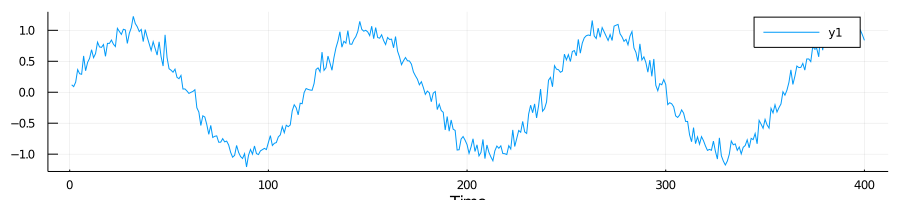

In [3]:
plot(z_data, xlabel="Time", size=(900,200))

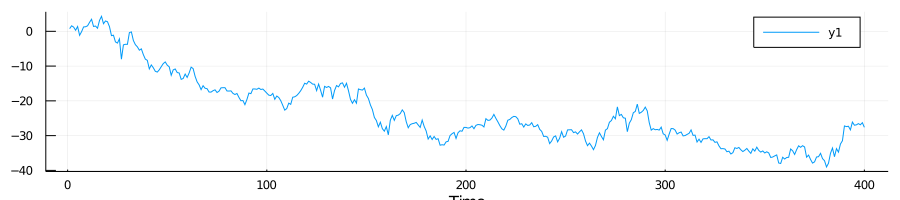

In [4]:
plot(y_data, xlabel="Time", size=(900,200))

In [5]:
m_z_FL = readdlm("FLmeanestimates.txt")
v_z_FL = readdlm("FLvarestimates.txt")
m_z_ADVI = readdlm("ADVImeanestimates.txt")
v_z_ADVI = readdlm("ADVIvarestimates.txt")
;

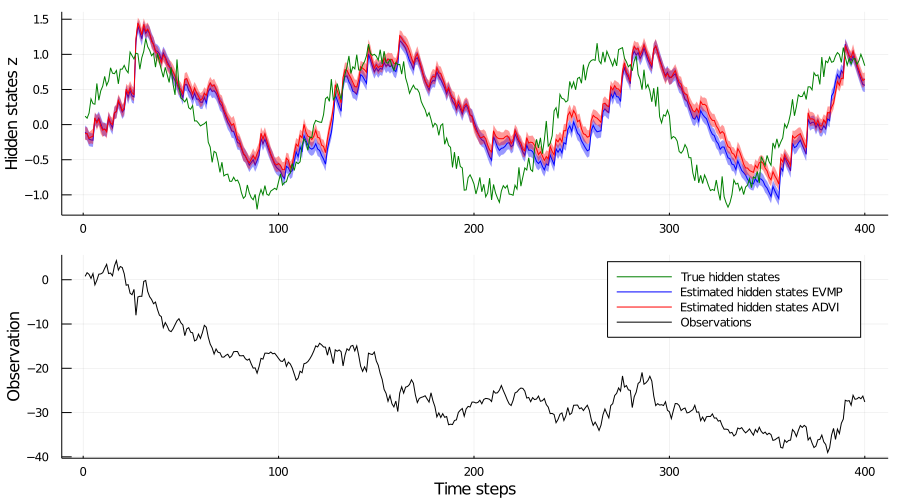

In [18]:
gr()
l = @layout [a ; b]

p1 = plot(m_z_FL, ribbon=v_z_FL, fillalpha=0.4, lw=1, color=:blue, label="Estimated hidden states EVMP",legend=false, yaxis="Hidden states z")
p1 = plot!(m_z_ADVI, ribbon=v_z_ADVI, fillalpha=0.4, lw=1, color=:red, label="Estimated hidden states ADVI",legend=false)
plot!(z_data,lw=1,label="True hidden states", color=:green)

p2 = plot([fill(NaN, T) fill(NaN, T) fill(NaN, T) y_data], lw=1, color=[:green :blue :red :black], label=["True hidden states" "Estimated hidden states EVMP" "Estimated hidden states ADVI" "Observations"], legend=:topright, xaxis="Time steps", yaxis="Observation", link=:x)

p = plot(p1, p2, layout = l, size = (900, 500))